## **HEART DISEASE PREDICTION**


Insight bisnis : Memprediksi faktor yang paling berkontribusi terhadap resiko penyakit jantung?

**Bisnis Understanding**: Dari semua informasi yang ada dataset, maka kita bisa mengetahui faktor yang mempengaruhi penyakit jantung

## **EDA**

**Data Understanding**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Adi\Documents\codingan\data\heart.csv")

In [3]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [4]:
#Statistik deskriptif
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Cek null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
### Codingan null value yang benar
df.isnull().sum().sum()

0

Tidak ditemukannya missing value pada dataset Heart Disease

In [7]:
corrmat = df.corr()


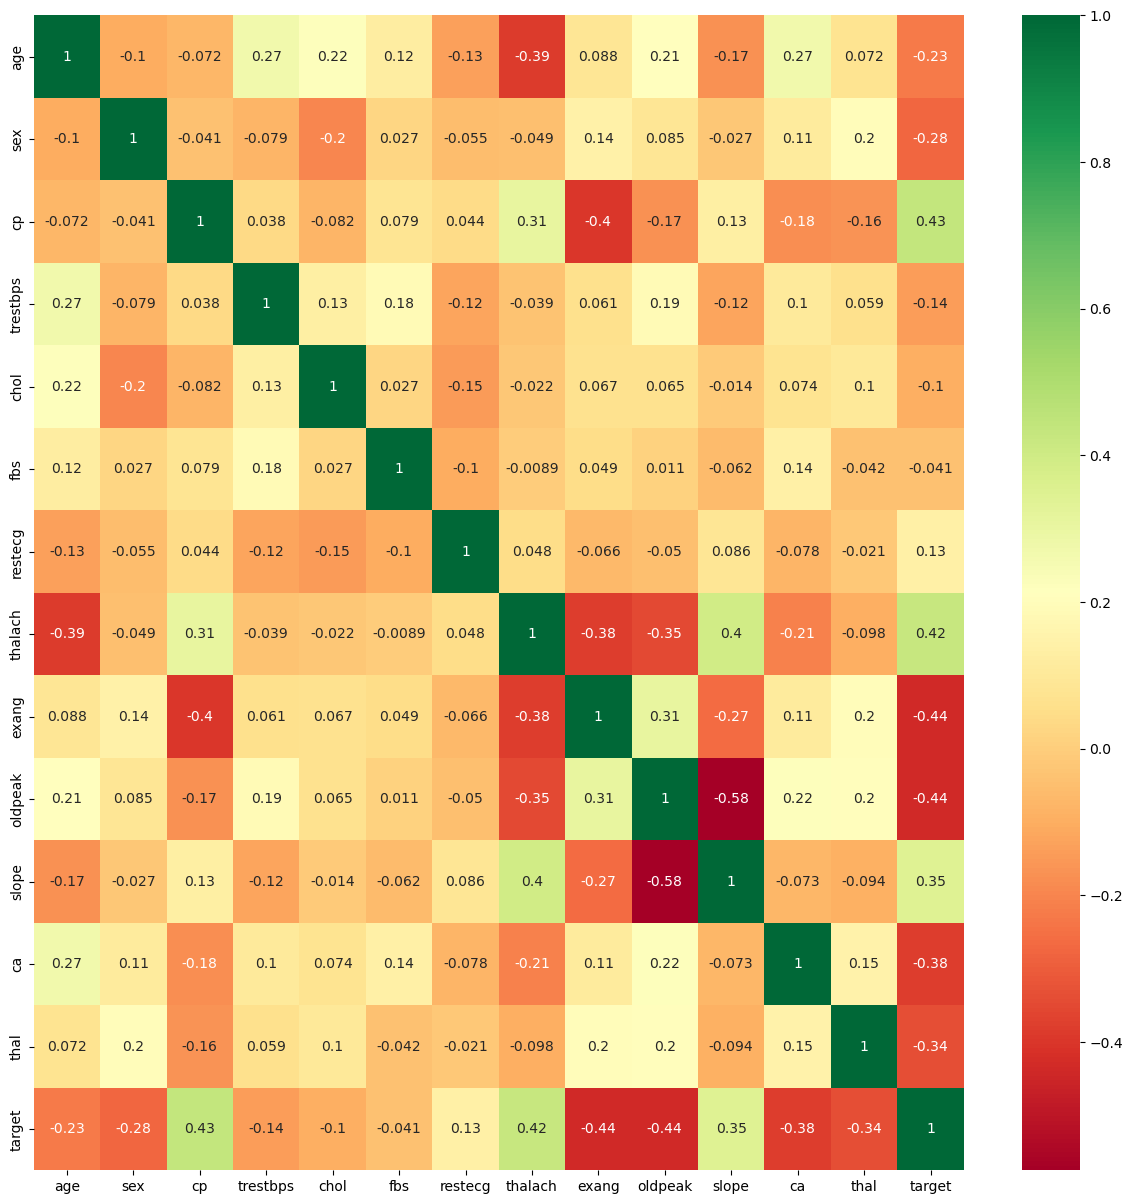

In [8]:
# Mengetahui Relasi antar Kolom menggunakan Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(15,15))

heatmap = sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

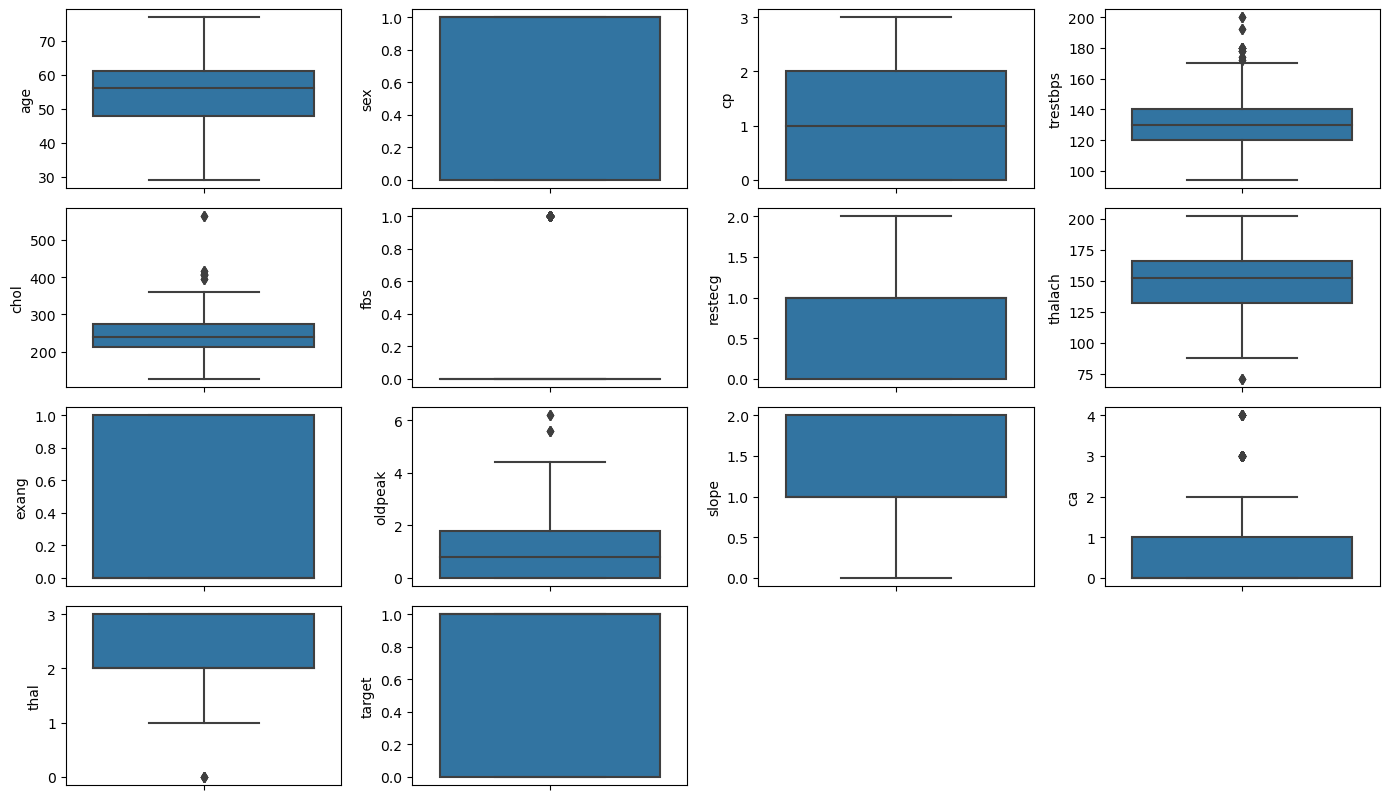

In [9]:
#Outliner menggunakan Boxplot
fig = plt.figure(figsize=(14,20),facecolor='white')

for i in range(len(df.columns)):
  fig.add_subplot(10,4,i+1)
  sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [10]:
#Cek Duplikat

total_duplikat_per_kolom = {}

for i in df.columns:
  total_duplikat_per_kolom[i] = df[i].duplicated().sum()

print(total_duplikat_per_kolom)

{'age': 984, 'sex': 1023, 'cp': 1021, 'trestbps': 976, 'chol': 873, 'fbs': 1023, 'restecg': 1022, 'thalach': 934, 'exang': 1023, 'oldpeak': 985, 'slope': 1022, 'ca': 1020, 'thal': 1021, 'target': 1023}


In [11]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

print("Outlier:")
print(outliers)

Outlier:
age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64


Disimpulkan bahwa dataset tidak memiliki misising value tetapi memiliki outliner pada kolom :
 - fbs : tekanan gula darah (153).
 - ca : Istilah "number of major vessels (0-3) colored by fluoroscopy" merujuk pada hasil tes diagnostik yang digunakan untuk memeriksa kondisi jantung (87).

- trestbps: tekanan darah (30).
- chol : pengukuran konsentrasi kolesterol dalam darah (16).
- thal : hasil tes medis yang dikenal sebagai thallium (7).

**Data Preprocessing**

In [12]:
#Handling Outliner

#Menghitung jumlah value 0 dan 1 pada kolom 'fbs'
jumlah_0 = (df['fbs'] == 0).sum()
print('jumlah angka 0:',jumlah_0)

jumlah angka 0: 872


In [13]:
jumlah_1 = df['fbs'].sum()
print('jumlah angka 1:',jumlah_1)

jumlah angka 1: 153


In [14]:
# Cek unique value di thal
nilai_unik = df['thal'].unique()
jumlah_baris = df['thal'].value_counts()
print(nilai_unik)
print(jumlah_baris)

[3 2 1 0]
2    544
3    410
1     64
0      7
Name: thal, dtype: int64


Thal sudah tidak outliner dan langsung bisa gunakan saat ML

In [15]:
#Handling Duplikat

# Mendeteksi duplikat pada semua kolom
duplicate_rows = df[df.duplicated()]

# Mendeteksi duplikat pada kolom tertentu
duplicate_rows = df[df.duplicated(subset=['age','sex','cp','trestbps', 'chol', 'restecg','thalach', 'exang','oldpeak','slope'])]

# Menghitung jumlah duplikat pada kolom tertentu
duplicate_count = df.duplicated(subset=['age','sex','cp','trestbps', 'chol', 'restecg','thalach', 'exang','oldpeak','slope']).sum()
print(duplicate_count)


723


### **Feature Engineering**

Untuk menentukan faktor yang paling berkontribusi terhadap risiko penyakit jantung, dapat menggunakan berbagai teknik analisis data, seperti  Random Forest.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
data = pd.read_csv(r"C:\Users\Adi\Documents\codingan\data\heart.csv")

Pisahkan dataset menjadi (X) dan  (y).

In [18]:
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak',  'slope', 'ca', 'thal']]
y = data['target']

Pisahkan dataset menjadi data pelatihan dan pengujian.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
feature_importance = model.feature_importances_
feature_names = X.columns

# Menampilkan fitur importance
for name, importance in zip(feature_names, feature_importance):
    print(f'{name}: {importance}')

age: 0.07790831761825727
sex: 0.028731063614836953
cp: 0.13507197453533204
trestbps: 0.07117087529075947
chol: 0.07482220268882704
fbs: 0.008443602064153139
restecg: 0.018556906142942732
thalach: 0.12216864549468961
exang: 0.05759449379975219
oldpeak: 0.121904718442662
slope: 0.04578200610925984
ca: 0.1273270473259574
thal: 0.11051814687257032
